# Week 3 Assignment:
**Develop and Analyze a Linear Regression Model**

***Import Required Libraries***

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

***Import the dataset***

In [34]:
# Load dataset with proper encoding
from google.colab import files

# Upload the dataset
file_path = files.upload()

# Extract the uploaded file name
uploaded_file_name = list(file_path.keys())[0]

# Load the dataset with appropriate encoding
try:
    data = pd.read_csv(uploaded_file_name, delimiter=",", encoding="utf-8")
except UnicodeDecodeError:
    # If utf-8 fails, try 'latin-1' encoding
    data = pd.read_csv(uploaded_file_name, delimiter=",", encoding="latin-1")

# Basic info about the dataset
data.info()

Saving SeoulBikeData.csv to SeoulBikeData (5).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13

***Data cleaning and preprocessing***

In [36]:
# Convert 'Date' column to datetime with the correct format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Rename columns for easier access
data.columns = data.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Drop duplicates (if any)
data.drop_duplicates(inplace=True)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Date                       0
Rented_Bike_Count          0
Hour                       0
Temperature°C              0
Humidity%                  0
Wind_speed_m/s             0
Visibility_10m             0
Dew_point_temperature°C    0
Solar_Radiation_MJ/m2      0
Rainfallmm                 0
Snowfall_cm                0
Seasons                    0
Holiday                    0
Functioning_Day            0
dtype: int64


***Exploratory Data Analysis (EDA)***

In [38]:
# Display dataset information
print(data.info())

# Statistical summary
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8760 non-null   datetime64[ns]
 1   Rented_Bike_Count        8760 non-null   int64         
 2   Hour                     8760 non-null   int64         
 3   Temperature°C            8760 non-null   float64       
 4   Humidity%                8760 non-null   int64         
 5   Wind_speed_m/s           8760 non-null   float64       
 6   Visibility_10m           8760 non-null   int64         
 7   Dew_point_temperature°C  8760 non-null   float64       
 8   Solar_Radiation_MJ/m2    8760 non-null   float64       
 9   Rainfallmm               8760 non-null   float64       
 10  Snowfall_cm              8760 non-null   float64       
 11  Seasons                  8760 non-null   object        
 12  Holiday                  8760 non-

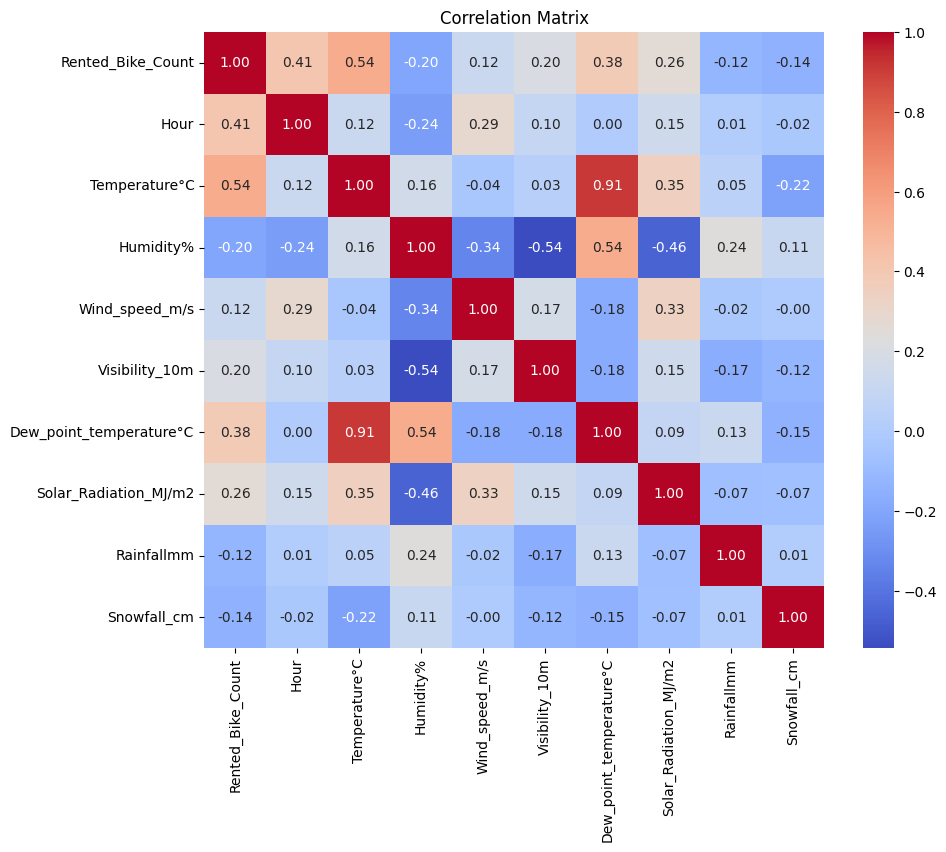

In [40]:
# Drop non-numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

***Feature selection and splitting the data***

In [44]:
# Selected features based on correlation and domain knowledge
# Target variable: Rented_Bike_Count
# Features: Hour, Temperature°C, Humidity%, Wind_speed/m/s, Visibility_10m, Dew_point_temperature°C
X = data[['Hour', 'Temperature°C', 'Humidity%', 'Wind_speed_m/s', 'Visibility_10m', 'Dew_point_temperature°C']]

# Target variable
y = data['Rented_Bike_Count']

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (7008, 6)
Testing set size: (1752, 6)


In [42]:
print(data.columns)

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature°C', 'Humidity%',
       'Wind_speed_m/s', 'Visibility_10m', 'Dew_point_temperature°C',
       'Solar_Radiation_MJ/m2', 'Rainfallmm', 'Snowfall_cm', 'Seasons',
       'Holiday', 'Functioning_Day'],
      dtype='object')


***Develop the linear regression model***

In [45]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 718.2188125470327
Coefficients: [ 28.8500387   10.62982228 -10.68306015  -7.65674546   0.0511511
  19.11853386]


***Model evaluation***

In [46]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 229927.44123769115
Mean Absolute Error (MAE): 352.2706464198336
R-squared (R²): 0.4481470839571323


***Residual analysis***

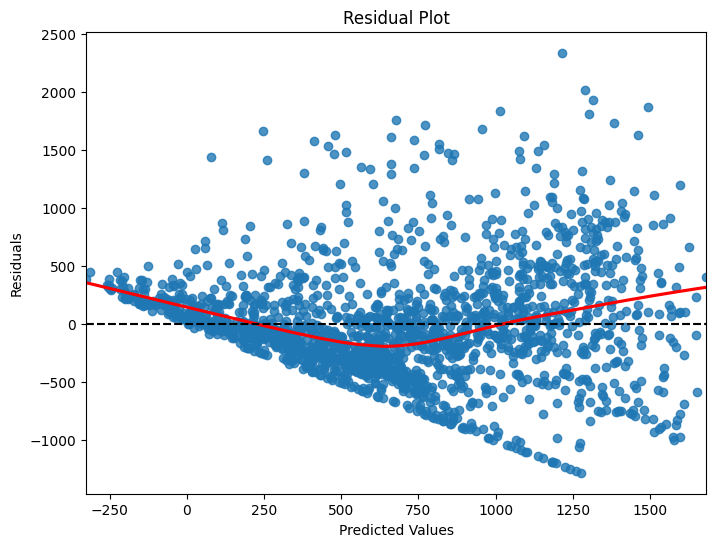

In [47]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(0, color='black', linestyle='--')
plt.show()

***Visualize actual vs. predicted values***

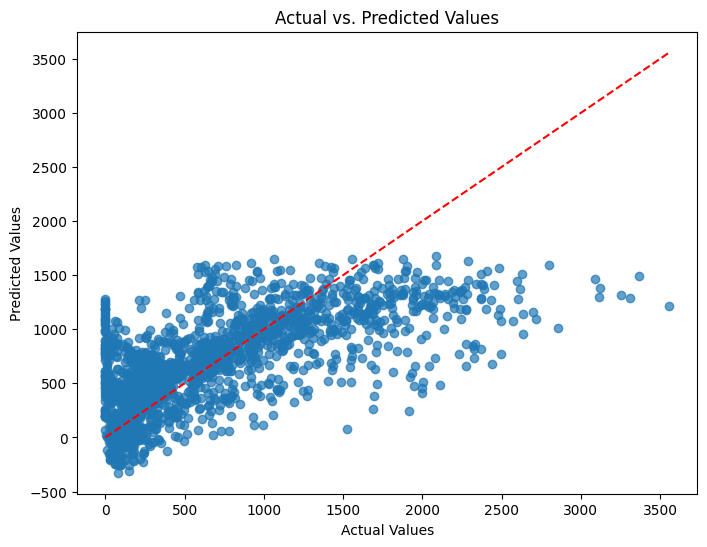

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.show()

***Discussion of coefficients***

In [49]:
# Display feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

# Interpret coefficients
for feature, coef in zip(X.columns, model.coef_):
    print(f"Effect of {feature}: {coef:.2f} change in Rented Bike Count per unit increase.")

                   Feature  Coefficient
0                     Hour    28.850039
1            Temperature°C    10.629822
2                Humidity%   -10.683060
3           Wind_speed_m/s    -7.656745
4           Visibility_10m     0.051151
5  Dew_point_temperature°C    19.118534
Effect of Hour: 28.85 change in Rented Bike Count per unit increase.
Effect of Temperature°C: 10.63 change in Rented Bike Count per unit increase.
Effect of Humidity%: -10.68 change in Rented Bike Count per unit increase.
Effect of Wind_speed_m/s: -7.66 change in Rented Bike Count per unit increase.
Effect of Visibility_10m: 0.05 change in Rented Bike Count per unit increase.
Effect of Dew_point_temperature°C: 19.12 change in Rented Bike Count per unit increase.
